0 1
1 1
2 0
3 1


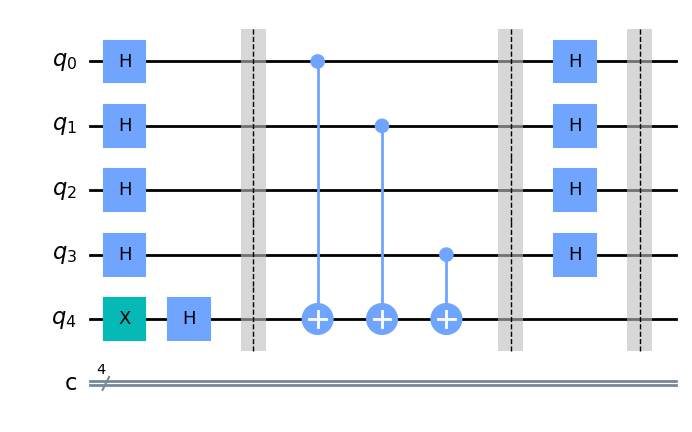

In [6]:
from qiskit import *
str='1011'

qc=QuantumCircuit(len(str)+1,len(str))
qc.x(len(str))
qc.h(range(len(str)+1))
qc.barrier()

elem=enumerate(reversed(str))
for k,val in elem:
    print (k,val)
    if val == '1':
        # print(k,val)
        qc.cx(k,len(str))
qc.barrier()

qc.h(range(len(str)))
qc.barrier()

qc.draw('mpl')

结论：cx门可能会从t作用到c，在t出于叠加态的情况下。\
如果c-bit在h态，t-bit处于极化态，那么cx门作用会导致纠缠态；\
如果c-bit处于h态，t-bit处于0+1，那么cx作用无效；\
（此处）t-bit处于0-1，c-bit处于h态，cx作用使c-bit的1态变号！！！！

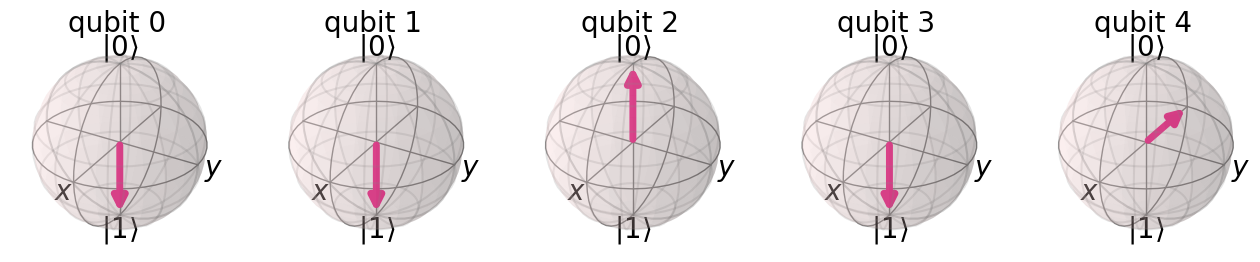

In [7]:
from qiskit.visualization import plot_bloch_multivector
sims=Aer.get_backend('statevector_simulator')
vector=execute(qc,sims).result().get_statevector()
#print(vector)
plot_bloch_multivector(vector)

In [8]:
qc.measure(range(len(str)),range(len(str)))
simq=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=simq,shots=10).result()
counts=result.get_counts()
print(counts)

{'1011': 10}


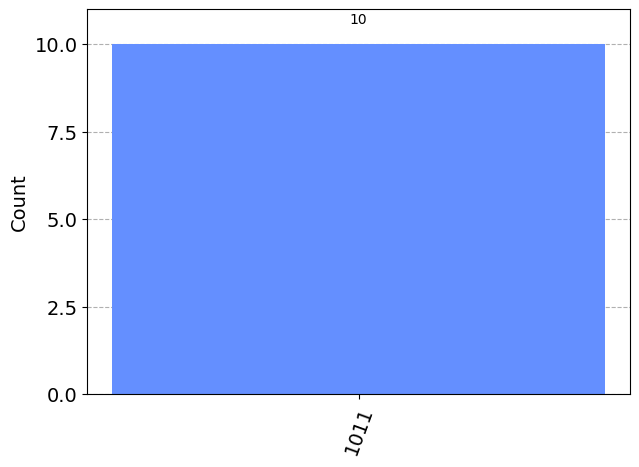

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)